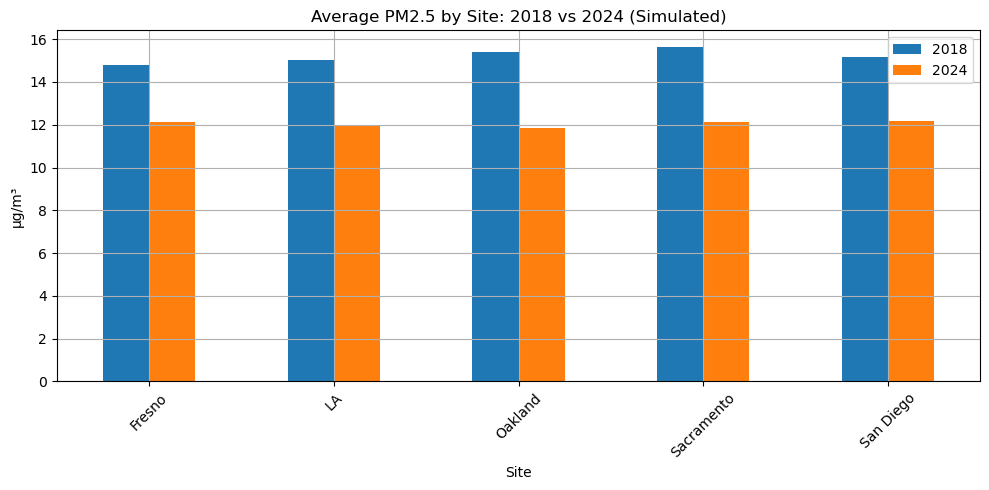

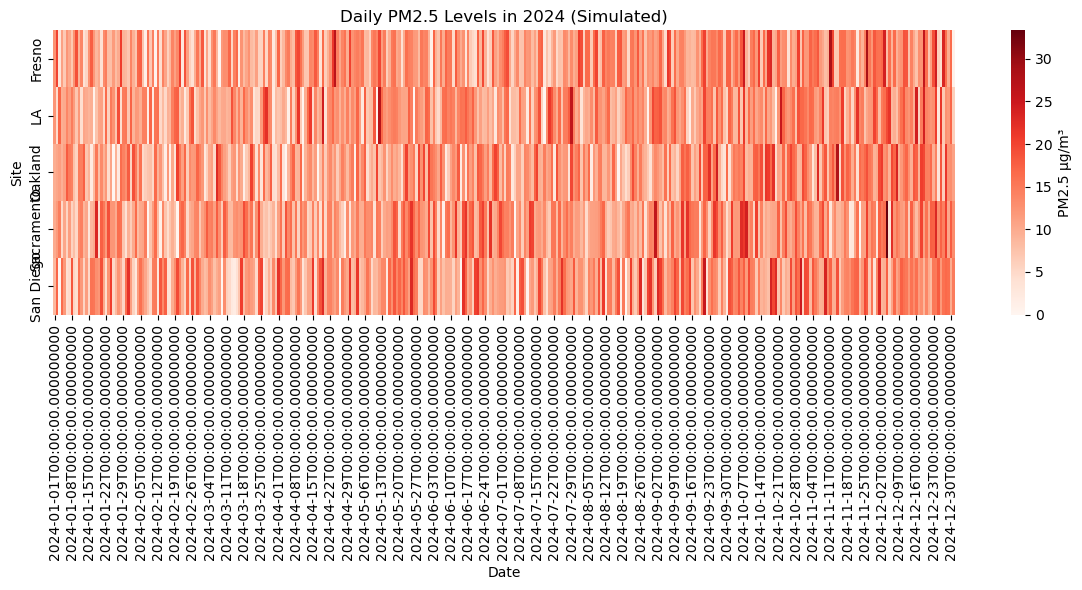

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Simulated data ---
np.random.seed(42)
sites = ["LA", "Fresno", "Sacramento", "Oakland", "San Diego"]
dates_2018 = pd.date_range("2018-01-01", "2018-12-31")
dates_2024 = pd.date_range("2024-01-01", "2024-12-31")

def make_fake_pm_data(sites, dates, base_level):
    data = []
    for site in sites:
        noise = np.random.normal(0, 5, len(dates))
        trend = np.linspace(-2, 2, len(dates))
        values = base_level + noise + trend
        values = np.clip(values, 0, None)
        data.append(pd.DataFrame({
            "Date": dates,
            "Site": site,
            "PM2.5": values
        }))
    return pd.concat(data)

df_2018 = make_fake_pm_data(sites, dates_2018, 15)
df_2024 = make_fake_pm_data(sites, dates_2024, 12)

# --- Daily means ---
avg_2018 = df_2018.groupby("Site")["PM2.5"].mean()
avg_2024 = df_2024.groupby("Site")["PM2.5"].mean()

# --- Bar plot comparison ---
comparison_df = pd.DataFrame({"2018": avg_2018, "2024": avg_2024})
comparison_df.plot(kind="bar", figsize=(10, 5))
plt.title("Average PM2.5 by Site: 2018 vs 2024 (Simulated)")
plt.ylabel("µg/m³")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Heatmap of daily values for one year ---
pivot_2024 = df_2024.pivot(index="Date", columns="Site", values="PM2.5")
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_2024.T, cmap="Reds", cbar_kws={'label': 'PM2.5 µg/m³'})
plt.title("Daily PM2.5 Levels in 2024 (Simulated)")
plt.xlabel("Date")
plt.ylabel("Site")
plt.tight_layout()
plt.show()
